In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_gp
import ariel_load
import ariel_load_FGS
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
kgs.debugging_mode = 1

local


In [2]:
train_data = kgs.load_all_train_data()
train_data = train_data

In [3]:
todo = dict()

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
todo['Baseline GP'] = model

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# todo['Baseline GP chk'] = model

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
loaders = model.model.starter_model.loaders
loaders[0].apply_wavelength_binning = ariel_load_FGS.ApplyWavelengthBinningFGS2()
loaders[0].apply_pixel_corrections.mask_hot = False
loaders[0].apply_full_sensor_corrections.inpainting_2d = False
loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = False
todo['New FGS'] = model


# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# loaders = model.model.starter_model.loaders
# loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
# loaders[1].apply_pixel_corrections.mask_hot = False
# loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
# loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
# loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
# loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
# loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
# loaders[1].apply_wavelength_binning.residual_threshold = np.inf
# model.model.run_in_parallel = True
# todo['New AIRS no residual threshold'] = model

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# loaders = model.model.starter_model.loaders
# loaders[1].apply_full_sensor_corrections.inpainting_wavelength = False
# loaders[1].apply_pixel_corrections.mask_hot = False
# loaders[1].apply_full_sensor_corrections.use_pca_for_background_removal = False
# loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = False
# loaders[1].apply_full_sensor_corrections.remove_background_remove_used_rows = False
# loaders[1].apply_wavelength_binning = ariel_load.ApplyWavelengthBinningAIRS2()
# loaders[1].apply_wavelength_binning.make_diagnostic_plots = False
# loaders[1].apply_wavelength_binning.residual_threshold = 50
# model.model.run_in_parallel = True
# todo['New AIRS residual threshold 50'] = model

In [4]:
kgs.sanity_checks_active = True
def fname(k):
    return kgs.temp_dir + 'evaluate_model_'+k+'__'+str(len(train_data))+'.pickle'
for k,v in todo.items():
    if not os.path.isfile(fname(k)):
        print(k)
        model = copy.deepcopy(v)
        
        # Precache data
        for d in tqdm(train_data):
            copy.deepcopy(d).load_to_step(5,model.model.starter_model.loaders)
        
        
        model.train(train_data)
        inferred_data = model.infer(train_data)
        print(k)
        kgs.score_metric(inferred_data, train_data)
        kgs.dill_save(fname(k), (inferred_data,model,kgs.git_commit_id))
    else:
        print(k)
        (inferred_data,model,_) = kgs.dill_load(fname(k))
        kgs.score_metric(inferred_data, train_data)

Baseline GP
Score:          0.6053
RMS error FGS:  211.91 ppm
RMS error AIRS: 163.05 ppm
New FGS


Processing in parallel: 100%|█████████████████████████████████████████████████████| 1099/1099 [1:38:32<00:00,  5.38s/it]


local
SpawnPoolWorker-3 3
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-1 1
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-2 2
CUDA_VISIBLE_DEVICES= 0
Opt time 667.3383095264435
New FGS
Score:          0.6079
RMS error FGS:  199.05 ppm
RMS error AIRS: 151.75 ppm


Baseline GP
[1.0005726661239256, 0.9982837142219477]
[-1.969758715764868e-06, 6.585139985208731e-06]
[1.4784126865415688, 1.346457870875012]
Score:          0.6234
RMS error FGS:  149.37 ppm
RMS error AIRS: 117.87 ppm

20
Score:          0.6239
RMS error FGS:  112.63 ppm
RMS error AIRS: 70.27 ppm

No fudge
Score:          0.6229
RMS error FGS:  149.37 ppm
RMS error AIRS: 117.87 ppm


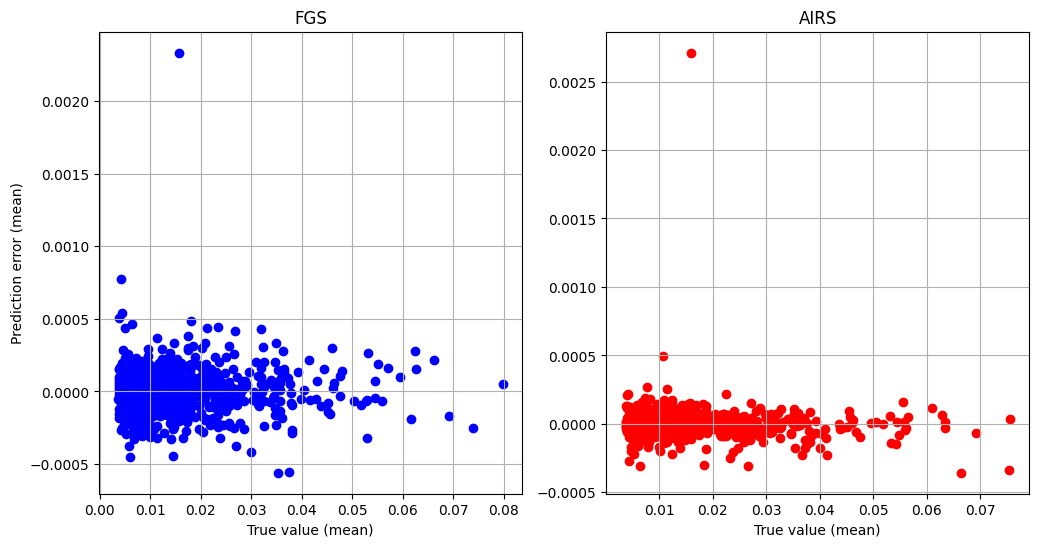

FGS
1344395817, ratio:5.005, x:1.120e-04, y:-5.607e-04, RMS:7.192e-05
4121191674, ratio:4.756, x:7.896e-05, y:-3.756e-04, RMS:1.333e-04
4233843352, ratio:4.709, x:5.664e-05, y:-2.667e-04, RMS:8.949e-05
3029952088, ratio:4.327, x:7.150e-05, y:-3.094e-04, RMS:1.996e-05
4054272977, ratio:4.278, x:7.059e-05, y:-3.020e-04, RMS:7.668e-05
2426761509, ratio:4.268, x:1.178e-04, y:5.027e-04, RMS:3.263e-05
2558852732, ratio:4.208, x:1.159e-04, y:4.878e-04, RMS:4.928e-05
695702599, ratio:3.991, x:9.501e-05, y:-3.792e-04, RMS:1.063e-04
1329906799, ratio:3.984, x:1.093e-04, y:4.355e-04, RMS:1.055e-04
1470836017, ratio:3.967, x:8.385e-05, y:3.326e-04, RMS:2.844e-04
AIRS
346757988, ratio:5.800, x:8.493e-05, y:4.926e-04, RMS:4.919e-04
229071424, ratio:4.193, x:6.387e-05, y:-2.678e-04, RMS:2.678e-04
4276158628, ratio:3.590, x:5.931e-05, y:2.129e-04, RMS:2.127e-04
4030268273, ratio:3.501, x:4.526e-05, y:1.584e-04, RMS:1.769e-04
906812046, ratio:3.408, x:7.863e-05, y:2.680e-04, RMS:2.777e-04
2105872353, r

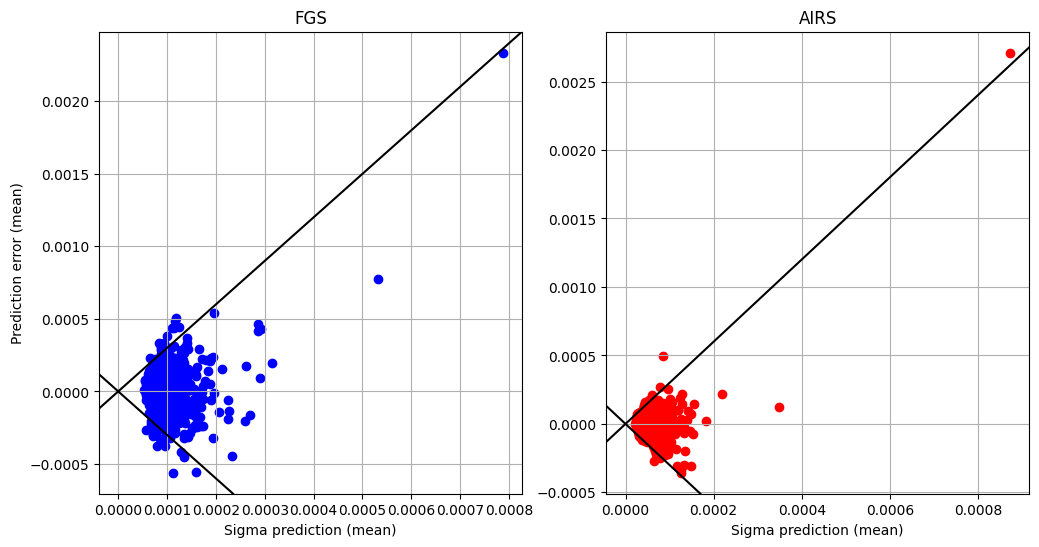

AIRS variation
926530491, ratio:4.407, x:1.594e-05, y:7.024e-05, RMS:9.907e-05
1843015807, ratio:4.044, x:1.602e-05, y:6.480e-05, RMS:2.710e-03
2364090646, ratio:3.598, x:1.609e-05, y:5.788e-05, RMS:3.054e-04
3196466205, ratio:3.564, x:1.489e-05, y:5.307e-05, RMS:1.002e-04
2617217319, ratio:3.438, x:1.494e-05, y:5.136e-05, RMS:5.283e-05
1470836017, ratio:3.256, x:8.724e-05, y:2.840e-04, RMS:2.844e-04
1329658345, ratio:3.245, x:1.521e-05, y:4.937e-05, RMS:9.988e-05
3098975946, ratio:3.243, x:1.489e-05, y:4.828e-05, RMS:5.473e-05
1748544529, ratio:3.120, x:1.465e-05, y:4.572e-05, RMS:4.922e-05
3660340795, ratio:3.116, x:1.473e-05, y:4.589e-05, RMS:5.052e-05


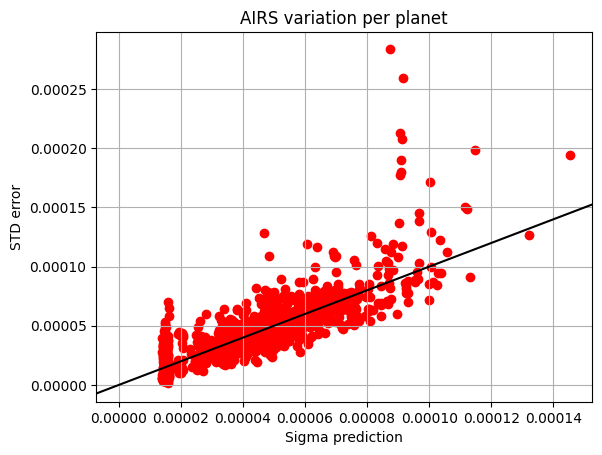

New FGS
[1.002333100175582, 0.9983167307851899]
[-7.23512597550878e-07, 6.5440482075930455e-06]
[1.4570372659883712, 1.3457286066741945]
Score:          0.6266
RMS error FGS:  125.77 ppm
RMS error AIRS: 103.23 ppm

20
Score:          0.6280
RMS error FGS:  85.72 ppm
RMS error AIRS: 69.42 ppm

No fudge
Score:          0.6269
RMS error FGS:  125.77 ppm
RMS error AIRS: 103.23 ppm


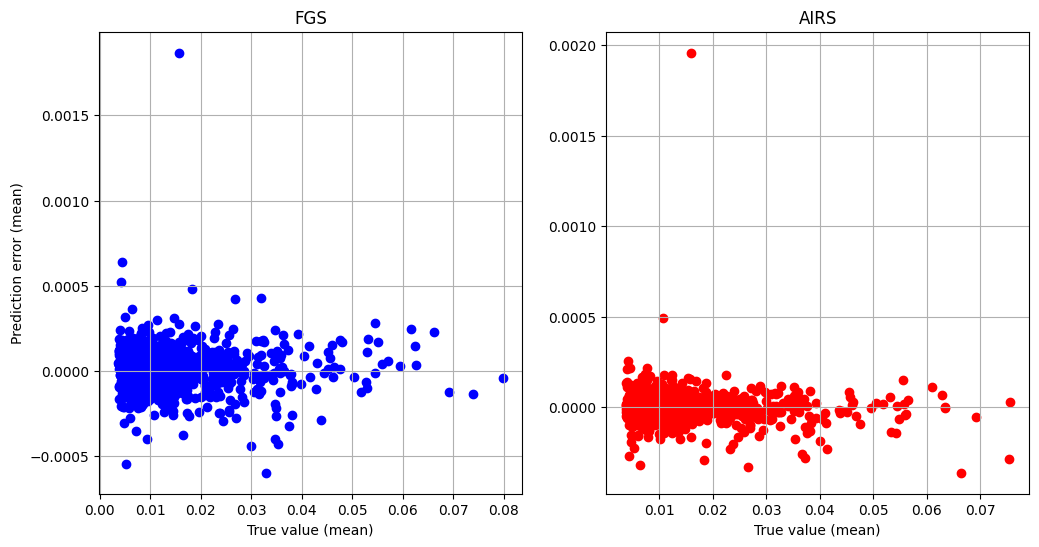

FGS
2498341557, ratio:5.145, x:6.850e-05, y:-3.525e-04, RMS:1.212e-04
342072318, ratio:4.925, x:5.998e-05, y:-2.954e-04, RMS:1.037e-04
1338107575, ratio:4.796, x:1.143e-04, y:-5.483e-04, RMS:6.340e-05
1344395817, ratio:4.575, x:9.394e-05, y:-4.298e-04, RMS:6.846e-05
2352142887, ratio:4.545, x:8.717e-05, y:-3.962e-04, RMS:1.319e-04
4121191674, ratio:4.368, x:6.354e-05, y:-2.775e-04, RMS:1.282e-04
1470836017, ratio:4.249, x:7.265e-05, y:3.087e-04, RMS:2.843e-04
1873761642, ratio:4.083, x:6.573e-05, y:2.684e-04, RMS:7.798e-05
2609891029, ratio:4.023, x:1.093e-04, y:-4.397e-04, RMS:3.283e-04
2681425531, ratio:3.581, x:1.792e-04, y:6.418e-04, RMS:1.650e-04
AIRS
346757988, ratio:5.747, x:8.571e-05, y:4.926e-04, RMS:4.919e-04
229071424, ratio:4.297, x:6.270e-05, y:-2.695e-04, RMS:2.694e-04
2609891029, ratio:4.004, x:5.008e-05, y:-2.005e-04, RMS:3.283e-04
4121191674, ratio:3.627, x:3.210e-05, y:-1.164e-04, RMS:1.282e-04
4276158628, ratio:3.564, x:5.926e-05, y:2.112e-04, RMS:2.110e-04
159733151

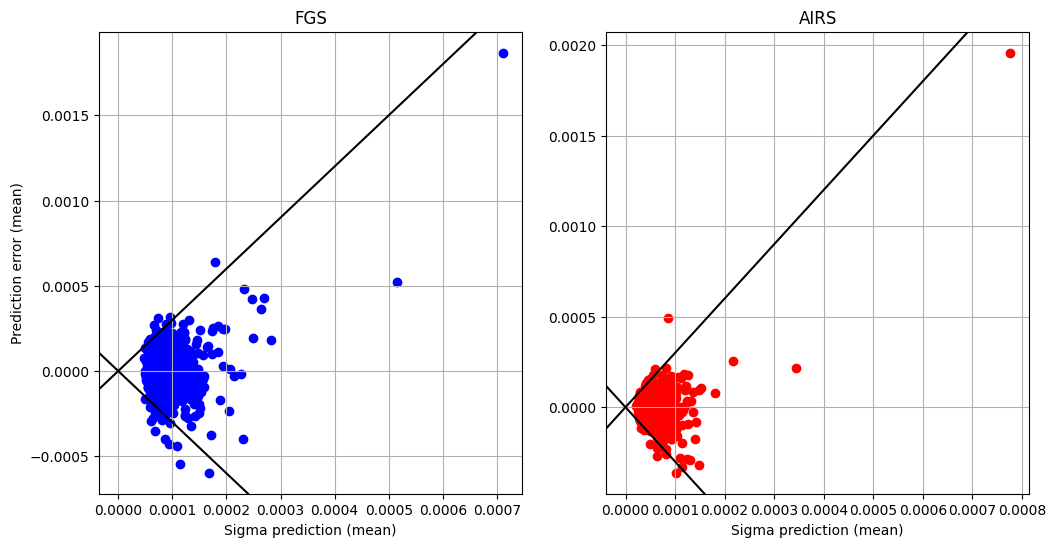

AIRS variation
926530491, ratio:4.406, x:1.594e-05, y:7.023e-05, RMS:1.163e-04
1843015807, ratio:4.044, x:1.603e-05, y:6.481e-05, RMS:1.958e-03
3196466205, ratio:3.653, x:1.452e-05, y:5.306e-05, RMS:9.982e-05
2364090646, ratio:3.598, x:1.609e-05, y:5.789e-05, RMS:3.003e-04
2617217319, ratio:3.403, x:1.510e-05, y:5.138e-05, RMS:5.246e-05
1470836017, ratio:3.283, x:8.652e-05, y:2.840e-04, RMS:2.843e-04
3098975946, ratio:3.240, x:1.486e-05, y:4.814e-05, RMS:6.525e-05
1329658345, ratio:3.217, x:1.535e-05, y:4.939e-05, RMS:1.025e-04
1748544529, ratio:3.120, x:1.466e-05, y:4.573e-05, RMS:5.089e-05
3660340795, ratio:3.068, x:1.495e-05, y:4.588e-05, RMS:4.934e-05


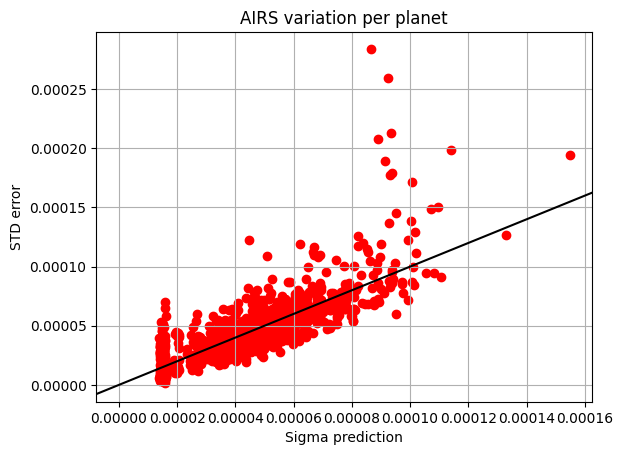

In [12]:
ignore_bad_planets = True
def filter_bad_data(data):
    data_out = []
    for d in data:
        if not d.planet_id in [1349926825, 3786449677, 2554492145, 1267010874, 94572221, 2270815333, 3649218579, 576917580, 2154305089, 2207815333, 2740910036]:
            data_out.append(d)
    return data_out
        
def basics():
    plt.grid(True)
    plt.box(True)
def plot_two_sensors(func, xl, yl, mod):
    _,ax = plt.subplots(1,2,figsize=(12,6))
    plt.sca(ax[0]);basics()
    plt.title('FGS')
    plt.xlabel(xl)
    plt.ylabel(yl)
    func(slice(0,1), 'blue', 'FGS')
    mod()
    
    plt.sca(ax[1]);basics()
    plt.title('AIRS')
    plt.xlabel(xl)
    func(slice(1,283), 'red', 'AIRS')
    mod()
    
    plt.pause(0.001)

def report_extreme_ratios(x,y,name):
    print(name)
    inds = np.argsort(np.abs(y/x))[::-1]
    for ii in inds[:10]:
        print(f'{inferred_data[ii].planet_id}, ratio:{np.abs(y[ii]/x[ii]):.3f}, x:{x[ii]:.3e}, y:{y[ii]:.3e}, RMS:{kgs.rms(error_matrix[ii,:]):.3e}')
    
    
for k,v in todo.items():
    (inferred_data,model,_) = kgs.dill_load(fname(k))
    if ignore_bad_planets:
        inferred_data = filter_bad_data(inferred_data)
        train_data_here = filter_bad_data(train_data)
    else:
        train_data_here = train_data
    #model.bias_a[0]+=0.006
    #model.bias_a[1]-=0.0002
    #inferred_data = model.infer(train_data)
    print(k)
    print(model.bias_a)
    print(model.bias_b)
    print(model.sigma_fudge)
    kgs.score_metric(inferred_data, train_data_here)
    print('')
    print('20')
    kgs.score_metric(inferred_data[:20], train_data_here[:20]) 
    print('')
    print('No fudge')
    model.sigma_fudge = [1,1]
    #model.bias_a = [1,1]
    #model.bias_b = [0,0]
    # print('!!!')
    inferred_data = model.infer(train_data)
    if ignore_bad_planets:
        inferred_data = filter_bad_data(inferred_data)
    kgs.score_metric(inferred_data, train_data_here)     
    error_matrix = np.array([d.spectrum - t.spectrum for d,t in zip(inferred_data,train_data_here)])
    true_matrix = np.array([t.spectrum for d,t in zip(inferred_data,train_data_here)])
    
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(true_matrix[:,slic],1)
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        
    plot_two_sensors(plot_prediction_vs_true, 'True value (mean)', 'Prediction error (mean)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = [np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data]
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)
    def mod():
        plt.axline((0,0), slope=3, color='black')
        plt.axline((0,0), slope=-3, color = 'black')        
    plot_two_sensors(plot_mean_error_vs_sigma, 'Sigma prediction (mean)', 'Prediction error (mean)', mod)
    
    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel('Sigma prediction')
    plt.ylabel('STD error')
    n=282
    x=np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
    y=np.sqrt(np.var(error_matrix[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    report_extreme_ratios(x,y,'AIRS variation')    
    plt.pause(0.001)

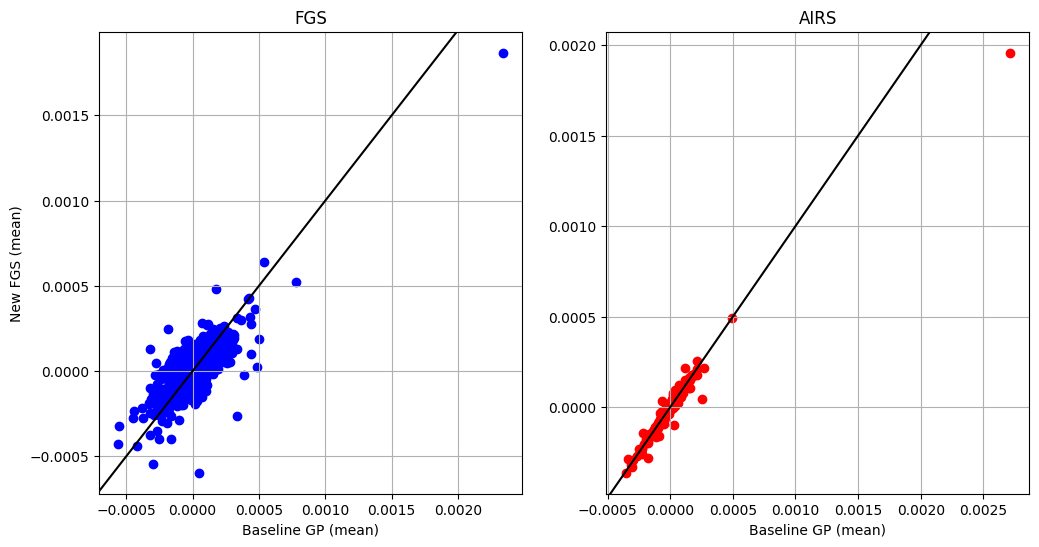

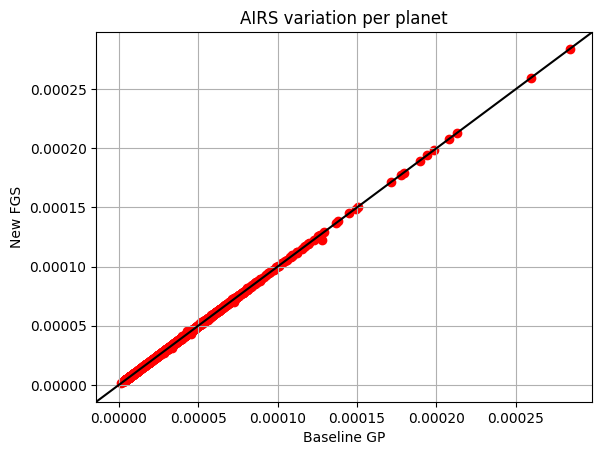

In [14]:
compare1= list(todo.keys())[0]
data1 = kgs.dill_load(fname(compare1))[0]
if ignore_bad_planets:
    data1 = filter_bad_data(data1)
for k,v in todo.items():    
    compare2= k
    if compare2==compare1:
        continue    
    data2 = kgs.dill_load(fname(compare2))[0]
    if ignore_bad_planets:
        data2 = filter_bad_data(data2)
        train_data_here = filter_bad_data(train_data)
    else:
        train_data_here = train_data           
    error1 = np.array([d.spectrum - t.spectrum for d,t in zip(data1,train_data_here)])
    error2 = np.array([d.spectrum - t.spectrum for d,t in zip(data2,train_data_here)])
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(error1[:,slic],1)
        y = np.mean(error2[:,slic],1)
        plt.scatter(x,y,color = col)

    plot_two_sensors(plot_prediction_vs_true, compare1+' (mean)', compare2+' (mean)', lambda:plt.axline((0,0),slope=1,color='black'))

    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel(compare1)
    plt.ylabel(compare2)
    x=np.sqrt(np.var(error1[:,1:],1))
    y=np.sqrt(np.var(error2[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    plt.pause(0.001)

In [7]:
# import subprocess

# # Hibernate Windows
# subprocess.run(
#     ["/mnt/c/Windows/System32/shutdown.exe", "/h"],  # add "/f" to force-close apps
#     check=True
# )

CompletedProcess(args=['/mnt/c/Windows/System32/shutdown.exe', '/h'], returncode=0)